# 모델 평가
모델의 성능을 평가한다. 평가결과에 따라 프로세스를 다시 반복한다.
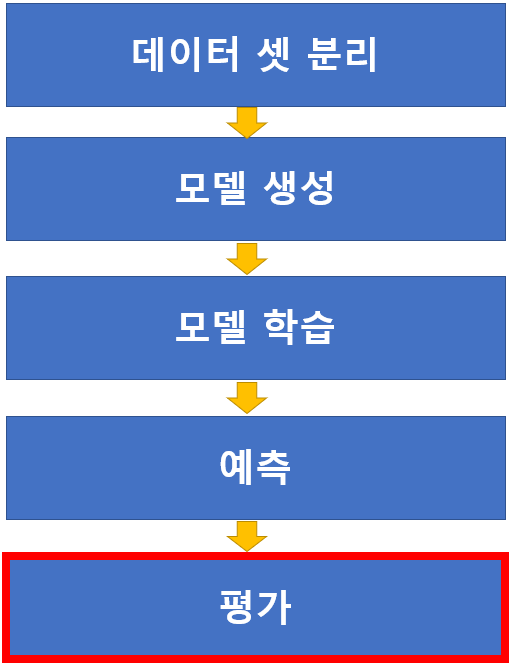

## 분류와 회귀의 평가방법
### 분류 평가 지표
1. 정확도 (Accuracy)
1. 정밀도 (Precision)
1. 재현률 (Recall)
1. F1점수 (F1 Score)
1. PR Curve, AP
1. ROC, AUC

### 회귀 평가방법
1. MSE (Mean Squareed Error)
1. RMSE (Root Mean Squared Error)
1. $R^2$ (결정계수) 1에 가까울 수록 좋은 값

### sckit-learn 평가함수 
- sklearn.metrics 모듈을 통해 제공

# 분류(Classification) 평가 기준
## 용어
- ### 이진 분류에서 양성과 음성
    - 양성(Positive): 예측하려는(찾으려는) 대상
    - 음성(Negative): 예측하려는 대상이 아닌 것
    - 예
        - 암환자 분류 : 양성 - 암 환자, 음성 - 정상인
        - 스팸메일 분류 : 양성 - 스팸메일, 음성 - 정상메일
        - 금융사기 모델: 양성 - 사기거래, 음성 - 정상거래
        
## 정확도 (Accuracy)

$$
\large{
정확도 (Accuracy) = \cfrac{맞게 예측한 건수} {전체 예측 건수}
}
$$

- 전체 예측 한 것중 맞게 예측한 비율로 평가한다.
- `accuracy_score(정답, 모델예측값)`

### Accuracy 평가지표의 문제
- 불균형 데이터의 경우 정확한 평가지표가 될 수 없다.
    - 예: 양성과 음성의 비율이 1:9 인 경우 모두 음성이라고 하면 정확도는 90%가 된다.


## MNIST Data set
- 손글씨 데이터 셋
- 사이킷런 제공 image size: 8(height) X 8(width) 
- https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
mnist = load_digits()
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
X = mnist['data']
y = mnist['target']
X.shape, y.shape
# 1797개의 이미지가 있음. X하나는 1차원 배열로 값이 구성되어 있음.

((1797, 64), (1797,))

In [4]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
mnist['feature_names']

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [6]:
# y 빈도수
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

In [7]:
X[0] # 첫 번째 그림
# 이미지를 표현하기 위해 1차원 배열을 2차원 배열로 바꿔야 하는데 0번축이 height, 1번축이 width

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
# 0 ~ 15: 검정 ~ 숫자가 커질수록 흰 색
X[0].reshape(8,8)
# print(y[0])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

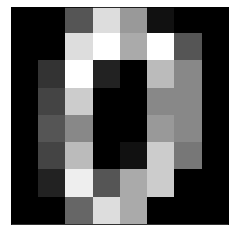

In [9]:
plt.imshow(X[0].reshape(8,8), cmap='gray')   # 2차원 ndarray를 넣어주면 image로 보여주는 함수
plt.xticks([])
plt.yticks([])
plt.show()

8


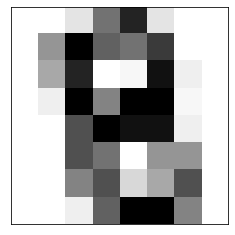

In [10]:
print(y[500])
plt.imshow(X[500].reshape(8,8), cmap='Greys')   # 2차원 ndarray를 넣어주면 image로 보여주는 함수
plt.xticks([])
plt.yticks([])
plt.show()

### 불균형 데이터셋으로 만들기
- y를 9와 나머지로 변경한다.
- Positive(양성 - 1): 9
- Negative(음성 - 0): 0 ~ 8

In [11]:
y = np.where(y == 9, 1, 0)   # True: 1, False: 0
np.unique(y, return_counts=True)

(array([0, 1]), array([1617,  180], dtype=int64))

### 훈련, 테스트 데이터셋 분할

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

### 모델 생성 및 학습

#### Dummy Model 정의
- Target Label중 무조건 최빈값으로 예측하는 모델을 정의한다.

In [13]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# 무조건 최빈값으로 예측하는 dummy 모델 생성
dummy_model = DummyClassifier(strategy='most_frequent')

# 학습
dummy_model.fit(X_train, y_train)

# 예측 + 평가
pred_train = dummy_model.predict(X_train)
pred_test = dummy_model.predict(X_test)

# 정확도
print(accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test))

0.8997772828507795 0.9


In [14]:
np.unique(pred_train), np.unique(pred_test)

(array([0]), array([0]))

## 혼동 행렬(Confusion Marix)
- 분류의 평가지표의 기준으로 사용된다.
- 혼동행렬을 이용해 다양한 평가지표(정확도, 재현률, 정밀도, F1 점수, AUC 점수)를 계산할 수 있다.
- 함수: confusion_matrix(정답, 모델예측값)
- 결과의 0번축: 실제 class, 1번 축: 예측 class

In [15]:
from sklearn.metrics import confusion_matrix
print('train 혼동 행렬')
confusion_matrix(y_train, pred_train)

train 혼동 행렬


array([[1212,    0],
       [ 135,    0]], dtype=int64)

In [16]:
print('test 혼동 행렬')
confusion_matrix(y_test, pred_test)

test 혼동 행렬


array([[405,   0],
       [ 45,   0]], dtype=int64)

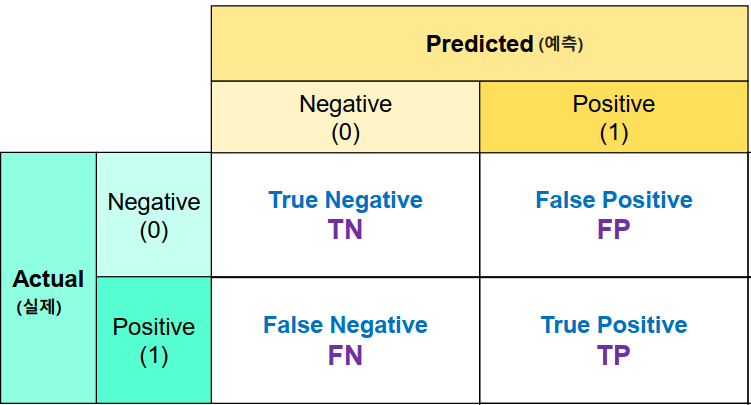

![img](https://skappal7.files.wordpress.com/2018/08/confusion-matrix.jpg?w=748)

- TP(True Positive) - 양성으로 예측했는데 맞은 개수
- TN(True Negative) - 음성으로 예측했는데 맞은 개수
- FP(False Positive) - 양성으로 예측했는데 틀린 개수 (음성을 양성으로 예측)
- FN(False Negative) - 음성으로 예측했는데 틀린 개수 (양성을 음성으로 예측)

## 이진 분류 평가점수
- ### Accuracy (정확도) 
    - 전체 데이터 중에 맞게 예측한 것의 비율
- ### Recall/Sensitivity(재현율/민감도) 
    - 실제 Positive(양성)인 것 중에 Positive(양성)로 예측 한 것의 비율
    - **TPR**(True Positive Rate) 이라고도 한다.
    - ex) 스팸 메일 중 스팸메일로 예측한 비율. 금융사기 데이터 중 사기로 예측한 비율
- ### Precision(정밀도) 
    - Positive(양성)으로 예측 한 것 중 실제 Positive(양성)인 비율
    - **PPV**(Positive Predictive Value) 라고도 한다.
    - ex) 스팸메일로 예측한 것 중 스팸메일의 비율. 금융 사기로 예측한 것 중 금융사기인 것의 비율

- ### F1 점수
    - 정밀도와 재현율의 조화평균 점수
    - recall과 precision이 비슷할수록 높은 값을 가지게 된다. 
    - F1 score가 높다는 것은 recall과 precision이 한쪽으로 치우쳐져 있지 않고 둘 다 좋다고 판단할 수 있는 근거가 된다.
    
### 기타
- ### Specificity(특이도)
    - 실제 Negative(음성)인 것들 중 Negative(음성)으로 맞게 예측 한 것의 비율
    - TNR(True Negative Rate) 라고도 한다.
- ### Fall out(위양성률)
    - 실제 Negative(음성)인 것들 중 Positive(양성)으로 잘못 예측한 것의 비율. `1 - 특이도`
    - **FPR** (False Positive Rate) 라고도 한다.
    - $ Fall-Out(FPF) = \cfrac{FP}{TN+FP}$

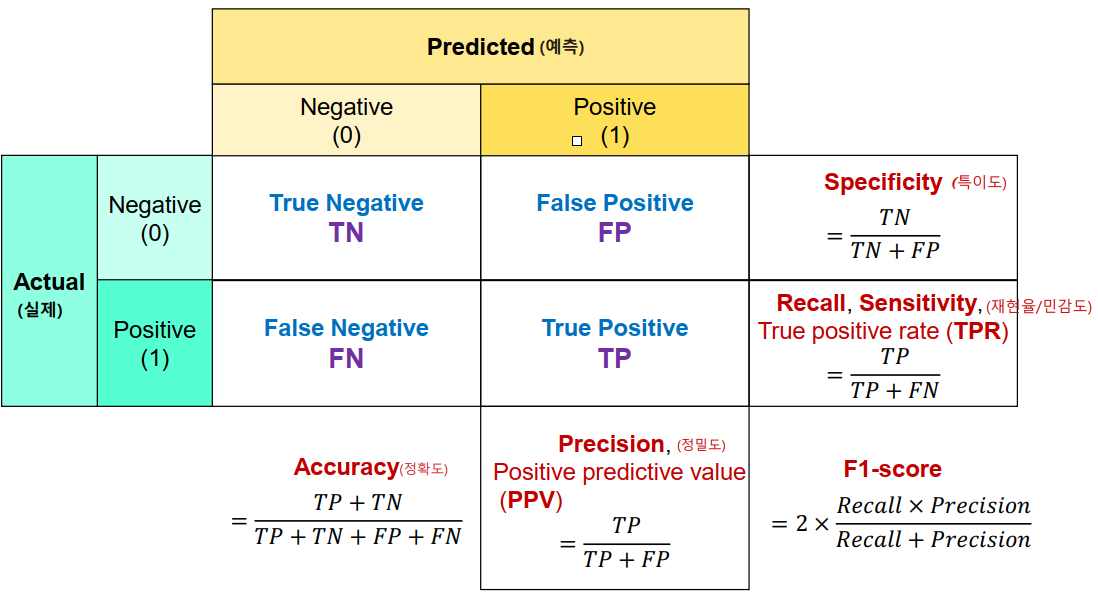

## 각 평가 지표 계산 함수
- sklearn.metrics 모듈
- ### confusion_matrix(y 실제값, y 예측값)
    - 혼돈 행렬 반환
- ### recall_score(y 실제값, y 예측값) 
  - Recall(재현율) 점수 반환 (Positive 중 Positive로 예측한 비율 (TPR))
- ### precision_score(y 실제값, y 예측값)
  - Precision(정밀도) 점수 반환 (Positive로 예측한 것 중 Positive인 것의 비율 (PPV))
- ### f1_score(y 실제값, y 예측값)
    - F1 점수 반환 (recall과 precision의 조화 평균값)
- ### classification_report(y 실제값, y 예측값)    
    - 클래스 별로 recall, precision, f1 점수와 accuracy를 종합해서 보여준다.

###   Dummy 모델 혼동행렬
> plot_confusion_matrix함수: 버전 2.1.3에서 추가됨. 없다고 에러나는 경우 업데이트 필요 `pip install scikit-learn --upgrade`

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, plot_confusion_matrix

In [18]:
print('Train confusion matrix')
print(confusion_matrix(y_train, pred_train))
print('-'*50)
print('Test confusion matrix')
print(confusion_matrix(y_test, pred_test))

Train confusion matrix
[[1212    0]
 [ 135    0]]
--------------------------------------------------
Test confusion matrix
[[405   0]
 [ 45   0]]


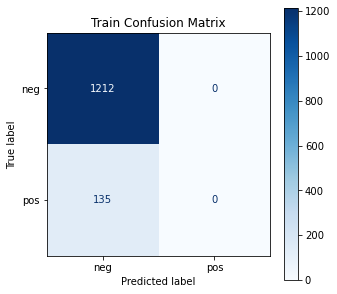

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(5,5))   # ax = plt.gca()   현재 axes 가져오는 메소드
# plot_confusion_matrix(학습한 모델, 예측할 X, 정답 y, ax=(그래프를 그릴 axes))    혼동행렬의 히트맵을 그려준다.
plot_confusion_matrix(dummy_model, X_train, y_train, ax=ax,
                     display_labels=['neg', 'pos'], values_format='d', cmap='Blues')
plt.title('Train Confusion Matrix')
plt.show()

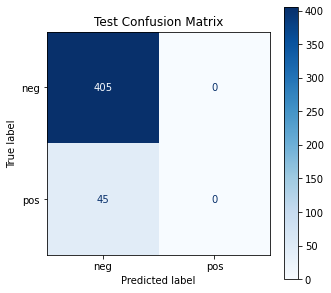

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
plot_confusion_matrix(dummy_model, X_test, y_test, ax=ax,
                     display_labels=['neg', 'pos'], values_format='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.show()

### dummy 모델 Accuracy, Recall, Precision, F1-Score

In [21]:
# accuracy_score
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print(acc_train, acc_test)

0.8997772828507795 0.9


In [22]:
# recall score
rec_train = recall_score(y_train, pred_train)
rec_test = recall_score(y_test, pred_test)
print(rec_train, rec_test)   # 0 --> 실제 양성 중에 맞춘 것은 하나도 없다. true positive 가 0

0.0 0.0


In [23]:
# precision score
precision_train = precision_score(y_train, pred_train)
precision_test = precision_score(y_test, pred_test)
print(precision_train, precision_test)   # 0 --> 양성으로 예측한 것 가운데 실제 양성이 하나도 없다.

0.0 0.0


C:\Users\Playdata\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Playdata\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
# f1 score(recall과 precisoin의 조화평균)
f1_train = f1_score(y_train, pred_train)
f1_test = f1_score(y_test, pred_test)
print(f1_train, f1_test)

0.0 0.0


In [25]:
from sklearn.metrics import classification_report
report = classification_report(y_train, pred_train)
print(report)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1212
           1       0.00      0.00      0.00       135

    accuracy                           0.90      1347
   macro avg       0.45      0.50      0.47      1347
weighted avg       0.81      0.90      0.85      1347



C:\Users\Playdata\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Playdata\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Playdata\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 머신러닝 모델을 이용해 학습

In [26]:
# # 데이터 분할
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

# DecisionTreeClassifier(max_depth=3)
from sklearn.tree import DecisionTreeClassifier

# 모델 생성
tree = DecisionTreeClassifier(random_state=0, max_depth=3)
# 학습
tree.fit(X_train, y_train)
# 평가 - confusion matrix, accuracy, recall, precision, f1_score
# 예측
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

# accuracy_score
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print(acc_train, acc_test)

0.9465478841870824 0.9511111111111111


In [27]:
print('train 혼동 행렬')
confusion_matrix(y_train, pred_train)

train 혼동 행렬


array([[1167,   45],
       [  27,  108]], dtype=int64)

In [28]:
print('test 혼동 행렬')
confusion_matrix(y_test, pred_test)

test 혼동 행렬


array([[394,  11],
       [ 11,  34]], dtype=int64)

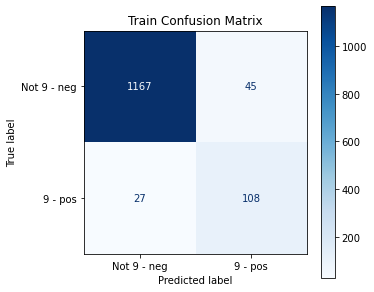

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
plot_confusion_matrix(tree, X_train, y_train, ax=ax,
                     display_labels=['Not 9 - neg', '9 - pos'], values_format='d', cmap='Blues')
plt.title('Train Confusion Matrix')
plt.show()

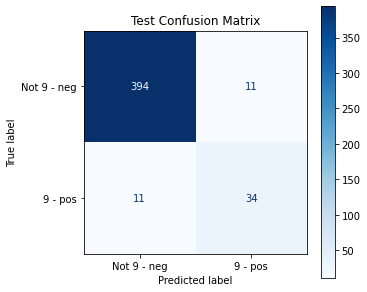

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
plot_confusion_matrix(tree, X_test, y_test, ax=ax,
                     display_labels=['Not 9 - neg', '9 - pos'], values_format='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.show()

In [31]:
# recall score
rec_train = recall_score(y_train, pred_train)
rec_test = recall_score(y_test, pred_test)
print(rec_train, rec_test)

0.8 0.7555555555555555


In [32]:
# precision score
precision_train = precision_score(y_train, pred_train)
precision_test = precision_score(y_test, pred_test)
print(precision_train, precision_test)

0.7058823529411765 0.7555555555555555


In [33]:
# f1 score
f1_train = f1_score(y_train, pred_train)
f1_test = f1_score(y_test, pred_test)
print(f1_train, f1_test)

0.7500000000000001 0.7555555555555555


### classification_report()


In [34]:
train_report = classification_report(y_train, pred_train)
print(train_report)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1212
           1       0.71      0.80      0.75       135

    accuracy                           0.95      1347
   macro avg       0.84      0.88      0.86      1347
weighted avg       0.95      0.95      0.95      1347



In [35]:
test_report = classification_report(y_test, pred_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       405
           1       0.76      0.76      0.76        45

    accuracy                           0.95       450
   macro avg       0.86      0.86      0.86       450
weighted avg       0.95      0.95      0.95       450



## 재현율과 정밀도의 관계

**이진 분류의 경우 Precision(정밀도)이 중요한 경우와 Recall(재현율)이 중요한 업무가 있다.**<br>
재현율과 정밀도는 반비례 관계

#### 재현율이 더 중요한 경우
- 실제 Positive 데이터를 Negative 로 잘못 판단하면 업무상 큰 영향이 있는 경우. 
- FN(False Negative)를 낮추는데 초점을 맞춘다.
- 암환자 판정 모델, 보험사기적발 모델

#### 정밀도가 더 중요한 경우
- 실제 Negative 데이터를 Positive 로 잘못 판단하면 업무상 큰 영향이 있는 경우.
- FP(False Positive)를 낮추는데 초점을 맞춘다.
- 스팸메일 판정


## 임계값(Threshold) 변경을 통한 재현율, 정밀도 변환
- 임계값 : 모델이 분류의 답을 결정할 때 기준값
- 정밀도나 재현율을 특히 강조해야 하는 상황일 경우 임계값 변경을 통해 평가 수치를 올릴 수있다.
- 단 극단적으로 임계점을 올리나가 낮춰서 한쪽의 점수를 높이면 안된다. (ex: 암환자 예측시 재현율을 너무 높이면 정밀도가 낮아져 걸핏하면 정상인을 암환자로 예측하게 된다.)
    
### 임계값 변경에 따른  정밀도와 재현율 변화관계
- 임계값을 높이면 양성으로 예측하는 기준을 높여서(엄격히 해서) 음성으로 예측되는 샘플이 많아 진다. 그래서 정밀도는 높아지고 재현율은 낮아진다.
- 임계값을 낮추면 양성으로 예측하는 기준이 낮아져서 양성으로 예측되는 샘플이 많아 진다. 그래서 재현율은 높아지고 정밀도는 낮아진다.
    - **임계값을 낮추면 재현율은 올라가고 정밀도는 낮아진다.**
    - **임계값을 높이면 재현율은 낮아지고 정밀도는 올라간다.**
- 임계값을 변화시켰을때 **재현율과 정밀도는 (반비례)음의 상관관계를 가진다.**
- 임계값을 변화시켰을때 재현율과 위양성율(Fall-Out/FPR)은 (비례)양의 상관관계를 가진다.


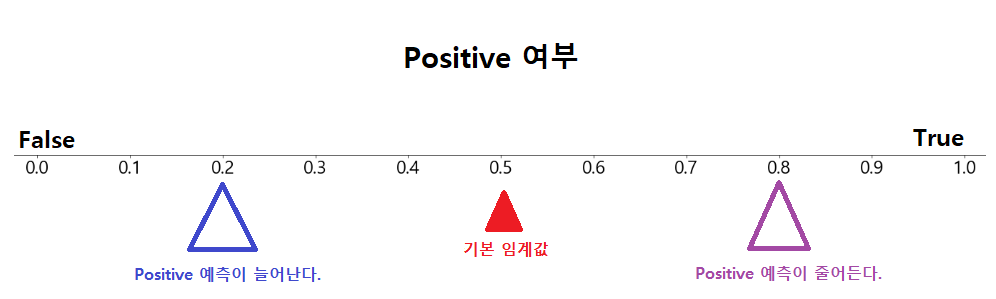

### 임계값 변화에 따른 recall, precision 변화

In [36]:
X_test.shape

(450, 64)

In [37]:
# model.predict(X) : 분류 -> 최종 class에 대한 추론 결과를 보여줌
# model.predict_proba(X) : input data 하나 당 추론 확률(probability)을 보여줌.
# 이진분류일 때 출력값: [0일 확률, 1일 확률]
# 다중분류일 때 출력값: [0일 확률, 1일 확률, ..., n일 확률]
pred_test = tree.predict(X_test)
print(pred_test.shape)  # input data 450개 각각에 대한 최종 결과
pred_test[-5:]

(450,)


array([1, 0, 0, 0, 0])

In [38]:
prob_test = tree.predict_proba(X_test)
print(prob_test.shape)
prob_test[-5:]

(450, 2)


array([[0.45454545, 0.54545455],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348]])

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
# 임계값을 변화시켰을 때 recall과 precision의 변화를 확인할 수 있는 지표를 제공 - PR curve
from sklearn.metrics import precision_recall_curve

In [40]:
# prob_test 가운데 1일 확률만 출력 (1번 인덱스만)
prob_test[:, 1]

array([0.00826446, 0.01304348, 0.01304348, 0.01304348, 0.01304348,
       0.01304348, 0.04      , 0.01304348, 0.01304348, 0.01304348,
       0.01304348, 0.01304348, 0.01304348, 0.75      , 0.03389831,
       0.01304348, 0.01304348, 0.01304348, 0.01304348, 0.14925373,
       0.54545455, 0.01304348, 0.01304348, 0.14925373, 0.01304348,
       0.00826446, 0.01304348, 0.03389831, 0.01304348, 0.01304348,
       0.01304348, 0.04      , 0.01304348, 0.01304348, 0.01304348,
       0.01304348, 0.01304348, 0.01304348, 0.01304348, 0.01304348,
       0.01304348, 0.01304348, 0.75      , 0.01304348, 0.00826446,
       0.75      , 0.01304348, 0.14925373, 0.01304348, 0.75      ,
       0.01304348, 0.01304348, 0.01304348, 0.03389831, 0.01304348,
       0.01304348, 0.01304348, 0.75      , 0.14925373, 0.01304348,
       0.00826446, 0.01304348, 0.01304348, 0.54545455, 0.01304348,
       0.01304348, 0.01304348, 0.00826446, 0.01304348, 0.75      ,
       0.01304348, 0.03389831, 0.75      , 0.01304348, 0.01304

In [41]:
# precision_recall_curve(y정답, 1일 확률)
# recall과 precision이 바뀌는 시점의 threshold, recall, precision을 반환해줌
precisions, recalls, thresholds = precision_recall_curve(y_test, prob_test[:, 1])
precisions.shape, recalls.shape, thresholds.shape   # ((8,), (8,), (7,))
# recall/precision은 threshold가 1일 때 결과값을 포함하지만 threshold는 1을 포함하지 않음
# 짝을 맞춰주려면 threshold에 1을 append 해주면 됨

((8,), (8,), (7,))

In [42]:
print(thresholds)
print(precisions)
print(recalls)

[0.00826446 0.01304348 0.03389831 0.04       0.14925373 0.54545455
 0.75      ]
[0.1        0.10757946 0.43181818 0.51388889 0.56060606 0.75555556
 0.82352941 1.        ]
[1.         0.97777778 0.84444444 0.82222222 0.82222222 0.75555556
 0.62222222 0.        ]


In [43]:
# threshold에 1을 추가
thresholds = np.append(thresholds, 1)

In [44]:
thresholds.shape

(8,)

In [45]:
df = pd.DataFrame({'Threshold':thresholds,
                   'Recall':recalls,
                   'Precision':precisions})
df

,Threshold,Recall,Precision
0,0.008264,1.000000,0.100000
1,0.013043,0.977778,0.107579
2,0.033898,0.844444,0.431818
3,0.040000,0.822222,0.513889
4,0.149254,0.822222,0.560606
5,0.545455,0.755556,0.755556
6,0.750000,0.622222,0.823529
7,1.000000,0.000000,1.000000


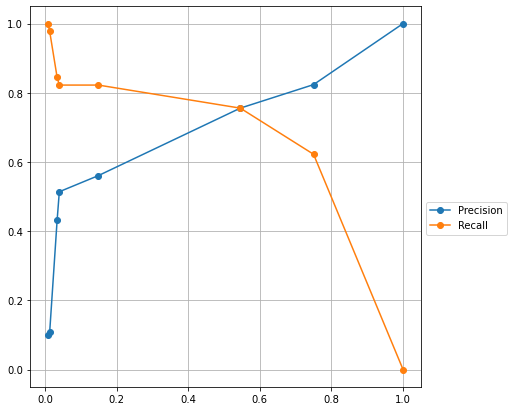

In [46]:
# precision_recall_curve -> line plot
# x축: thresholds, y축: recall/precision
plt.figure(figsize=(7,7))
plt.plot(thresholds, precisions, marker='o', label='Precision')
plt.plot(thresholds, recalls, marker='o', label='Recall')
plt.legend(loc='upper left',
           bbox_to_anchor=(1,0.5))  # right, center, bottom / bbox_to_anchor=(x좌표, y좌표) : axes의 각 꼭짓점이 legend박스의 loc를 기준점으로 어디있도록 할 것이냐
plt.grid(True)
plt.show()

### Binarizer - 임계값 변경
- Transformer로 양성 여부를 선택하는 임계값을 변경할 수 있다.

In [47]:
prob_test[:, 1]

array([0.00826446, 0.01304348, 0.01304348, 0.01304348, 0.01304348,
       0.01304348, 0.04      , 0.01304348, 0.01304348, 0.01304348,
       0.01304348, 0.01304348, 0.01304348, 0.75      , 0.03389831,
       0.01304348, 0.01304348, 0.01304348, 0.01304348, 0.14925373,
       0.54545455, 0.01304348, 0.01304348, 0.14925373, 0.01304348,
       0.00826446, 0.01304348, 0.03389831, 0.01304348, 0.01304348,
       0.01304348, 0.04      , 0.01304348, 0.01304348, 0.01304348,
       0.01304348, 0.01304348, 0.01304348, 0.01304348, 0.01304348,
       0.01304348, 0.01304348, 0.75      , 0.01304348, 0.00826446,
       0.75      , 0.01304348, 0.14925373, 0.01304348, 0.75      ,
       0.01304348, 0.01304348, 0.01304348, 0.03389831, 0.01304348,
       0.01304348, 0.01304348, 0.75      , 0.14925373, 0.01304348,
       0.00826446, 0.01304348, 0.01304348, 0.54545455, 0.01304348,
       0.01304348, 0.01304348, 0.00826446, 0.01304348, 0.75      ,
       0.01304348, 0.03389831, 0.75      , 0.01304348, 0.01304

In [48]:
# np.where를 이용해서 임계값 변경
threshold = 0.1
r = np.where(prob_test[:, 1]>=threshold, 1, 0)
r

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [49]:
np.unique(r, return_counts=True)

(array([0, 1]), array([384,  66], dtype=int64))

In [50]:
recall_score(y_test, r)

0.8222222222222222

In [51]:
# Binarizer 이용 - 여러 개의 값을 0과 1로 변환해주는 Transformer
from sklearn.preprocessing import Binarizer

exam = [[0.3, 0.4, 0.5, 0.6, 0.7]]   # 매개변수는 2차원으로 넣어야함
b = Binarizer(threshold=0.5)   # threshold 이하면 0, 초과면 1로 변환
b.fit_transform(exam)

array([[0., 0., 0., 1., 1.]])

In [52]:
binarizer1 = Binarizer(threshold=0.5)
binarizer2 = Binarizer(threshold=0.1)
binarizer3 = Binarizer(threshold=0.7)
pred_test_0_5 = binarizer1.fit_transform(prob_test)[:, 1]
pred_test_0_1 = binarizer2.fit_transform(prob_test)[:, 1]
pred_test_0_7 = binarizer3.fit_transform(prob_test)[:, 1]

In [53]:
binarizer1.fit_transform(prob_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [54]:
pred_test_0_5

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [55]:
print("Threshold = 0.5")
print(recall_score(y_test, pred_test_0_5), precision_score(y_test, pred_test_0_5))
print("Threshold = 0.1")   # recall 증가. precision 감소
print(recall_score(y_test, pred_test_0_1), precision_score(y_test, pred_test_0_1))
print("Threshold = 0.7")
print(recall_score(y_test, pred_test_0_7), precision_score(y_test, pred_test_0_7))

Threshold = 0.5
0.7555555555555555 0.7555555555555555
Threshold = 0.1
0.8222222222222222 0.5606060606060606
Threshold = 0.7
0.6222222222222222 0.8235294117647058


## PR Curve(Precision Recall Curve-정밀도 재현율 곡선)와 AP Score(Average Precision Score)
- 0~1사이의 모든 임계값에 대하여 재현율(recall)과 정밀도(precision)의 변화를 이용한 평가 지표
- X축에 재현율, Y축에 정밀도를 놓고 임계값이 1에서부터 0으로 변화할 때 두 값의 변화를 선그래프로 그린다.
- AP Score
    - PR Curve의 성능평가 지표를 하나의 점수(숫자)로 평가한것.
    - PR Curve의 선아래 면적을 계산한 값으로 높을 수록 성능이 우수하다.
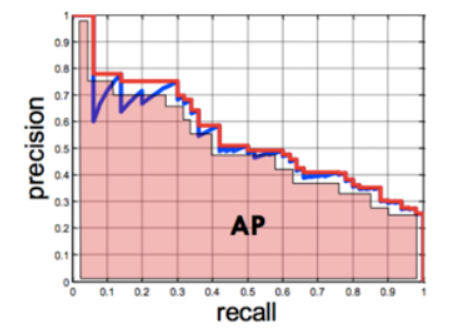   

- recall 관점(실제 positive를 positive로 잘 예측하는지)에서 성능 지표를 확인하는 모델.
- AP점수는 0~1사이, 클수록 좋은 값
- threshold를 변경해서 recall점수를 올렸을 때 precision이 언제, 얼마나 떨어지는지를 지표화한 것.
- precision_recall_curve() : threshold별 recall/precision 점수 반환 함수
- plot_precision_recall_curve() : PR curve를 그려주는 함수
- average_precision_score() : AP score 계산 함수

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [57]:
# 모델 생성
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
rf = RandomForestClassifier(max_depth=2, n_estimators=200, random_state=0)

# 학습
tree.fit(X_train, y_train)
rf.fit(X_train, y_train)

# 추론(확률)
proba_test_tree = tree.predict_proba(X_test)[:, 1]
proba_test_rf = rf.predict_proba(X_test)[:, 1]

In [58]:
# 평가지표 - precision_recall_curve
precision1, recall1, threshold1 = precision_recall_curve(y_test, proba_test_tree)   # (y정답, 양성일 확률)
precision2, recall2, threshold2 = precision_recall_curve(y_test, proba_test_rf)

In [59]:
print("tree 결과")
pd.DataFrame({
    "Threshold": np.append(threshold1, 1),
    "Precision": precision1,
    "Recall": recall1
})

tree 결과


,Threshold,Precision,Recall
0,0.008264,0.100000,1.000000
1,0.013043,0.107579,0.977778
2,0.033898,0.431818,0.844444
3,0.040000,0.513889,0.822222
4,0.149254,0.560606,0.822222
5,0.545455,0.755556,0.755556
6,0.750000,0.823529,0.622222
7,1.000000,1.000000,0.000000


In [60]:
print("RandomForest 결과")
df_rf = pd.DataFrame({
        "Threshold": np.append(threshold2, 1),
        "Precision": precision2,
        "Recall": recall2
    })
df_rf

RandomForest 결과


,Threshold,Precision,Recall
0,0.080666,0.228426,1.000000
1,0.081213,0.224490,0.977778
2,0.083313,0.225641,0.977778
3,0.083402,0.226804,0.977778
4,0.083429,0.227979,0.977778
...,...,...,...
193,0.418662,1.000000,0.088889
194,0.429407,1.000000,0.066667
195,0.430382,1.000000,0.044444
196,0.456759,1.000000,0.022222


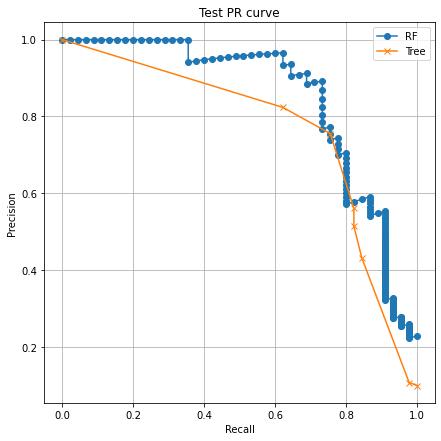

In [61]:
# precision recall curve - 직접 그리기
plt.figure(figsize=(7,7))
# X축 - recall, y축 - precision
plt.plot(recall2, precision2, marker='o', label='RF')
plt.plot(recall1, precision1, marker='x', label='Tree')

plt.legend()
plt.title("Test PR curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()

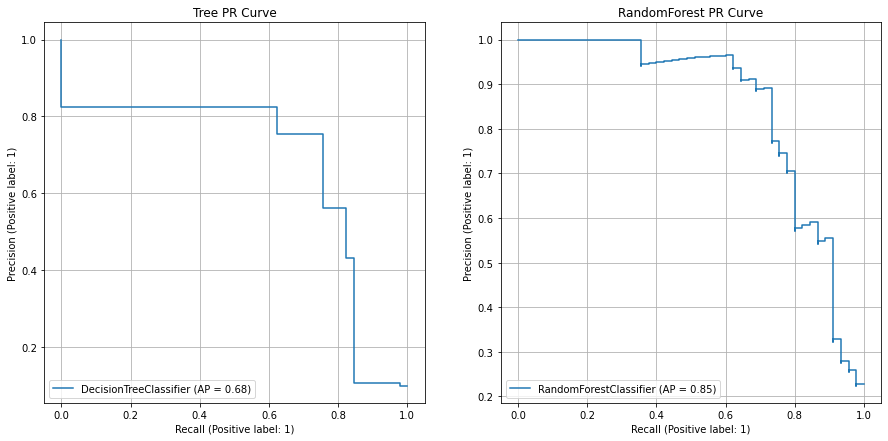

In [62]:
# plot_precision_recall_curve() 이용해서 그리기
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
# plot_precision_recall_curve(모델, X, y)
plot_precision_recall_curve(tree, X_test, y_test, ax=ax[0])
plot_precision_recall_curve(rf, X_test, y_test, ax=ax[1])

ax[0].set_title('Tree PR Curve')
ax[0].grid(True)
ax[1].set_title('RandomForest PR Curve')
ax[1].grid(True)
plt.show()

In [63]:
# AP score 조회
# average_precision_score(y값, 양성일 확률)
print('Decision Tree AP score', average_precision_score(y_test, proba_test_tree))
print('RandomForest AP score', average_precision_score(y_test, proba_test_rf))

Decision Tree AP score 0.6766948888666132
RandomForest AP score 0.8486345312919419


## ROC curve(Receiver Operating Characteristic Curve)와 AUC(Area Under the Curve) score

- **FPR(False Positive Rate-위양성율)**
    - 위양성율 (fall-out)
    - 1-특이도(TNR)
    - 실제 음성 중 양성으로 잘못 예측 한 비율
    $$
    \cfrac{FP}{TN+FP}
    $$
- **TPR(True Positive Rate-재현율/민감도)** 
    - 재현율(recall)
    - 실제 양성 중 양성으로 맞게 예측한 비율
    $$
    \frac{TP}{FN+TP}
    $$
- **ROC 곡선**
    - 2진 분류의 모델 성능 평가 지표 중 하나.
    - 불균형 데이터셋을 평가할 때 사용.
    - FPR을 X축, TPR을 Y축으로 놓고 임계값을 변경해서 FPR이 변할 때 TPR이 어떻게 변하는지 나타내는 곡선.
    - FPR이 올랐을 때 TPR이 많이 오를수록 좋은 모델
- **AUC**
    - ROC 곡선 아래쪽 면적
    - 0 ~ 1 사이 실수로 나오며 클수록 좋다.
   - **AUC 점수기준**
        - 1.0 ~ 0.9 : 아주 좋음
        - 0.9 ~ 0.8 : 좋음
        - 0.8 ~ 0.7 : 괜찮은 모델
        - 0.7 ~ 0.6 : 의미는 있으나 좋은 모델은 아님
        - 0.6 ~ 0.5 : 좋지 않은 모델

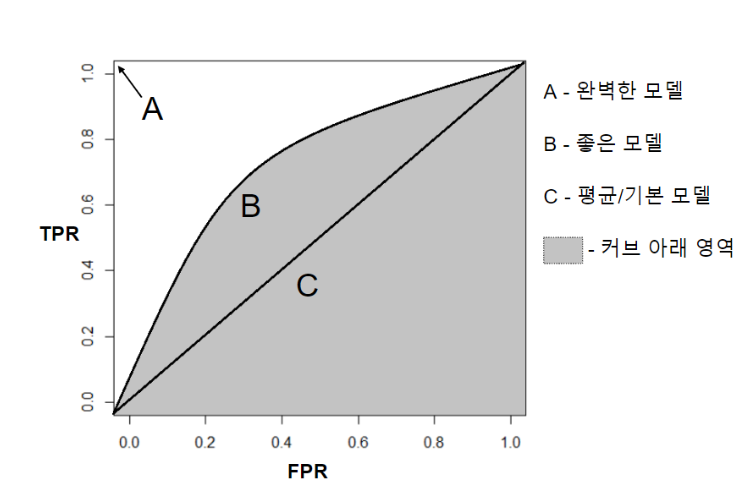

가장 완벽한 것은 FPR이 0이고 TPR이 1인 것이다. 
일반 적으로 FPR이 작을 때 (0에 가까울때) TPR이 높은 경우가 좋은 상황이다. 그래서 선 아래의 면적이 넓은 곡선이 나올 수록 좋은 모델이다.

### ROC, AUC 점수  확인
- roc_curve(y값, 예측확률) : FPR, TPR, Thresholds (임계치)
- roc_auc_score(y값, 예측확률) : AUC 점수 반환

## ROC Curve - PR Curve
- ROC: 이진분류에서 양성클래스 탐지와 음성클래스 탐지의 중요도가 비슷할 때 사용(개/고양이 분류)
- PR curve(Precision Recall 커브): 양성 클래스 탐지가 음성클래스 탐지의 중요도보다 높을 경우 사용(암환자 진단)

In [64]:
from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score

# roc_curve(y값, 양성확률) = FPRs(fall out, 위양성률), TPRs(recall), Thresholds 반환
fprs1, tprs1, thresholds1 = roc_curve(y_test, proba_test_tree)   # tree 모델 예측 결과
fprs2, tprs2, thresholds2 = roc_curve(y_test, proba_test_rf)   # random forest 예측 결과
fprs1.shape, tprs1.shape, thresholds1.shape, fprs2.shape, tprs2.shape, thresholds2.shape

((8,), (8,), (8,), (30,), (30,), (30,))

In [65]:
thresholds1

array([1.75      , 0.75      , 0.54545455, 0.14925373, 0.04      ,
       0.03389831, 0.01304348, 0.00826446])

In [66]:
# DataFrame으로 확인
pd.DataFrame({
        "Threshold": thresholds1,
        "fpr": fprs1,
        "tpr": tprs1
})

,Threshold,fpr,tpr
0,1.750000,0.000000,0.000000
1,0.750000,0.014815,0.622222
2,0.545455,0.027160,0.755556
3,0.149254,0.071605,0.822222
4,0.040000,0.086420,0.822222
5,0.033898,0.123457,0.844444
6,0.013043,0.901235,0.977778
7,0.008264,1.000000,1.000000


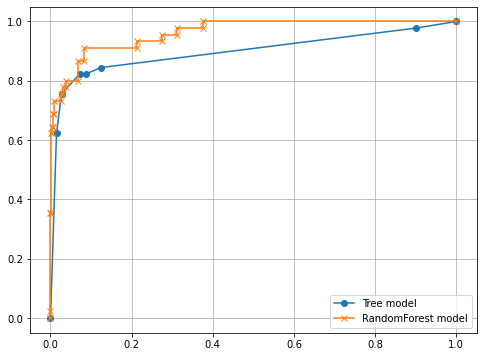

In [67]:
# ROC curve 직접 작성
plt.figure(figsize=(8,6))
plt.plot(fprs1, tprs1, marker='o', label='Tree model')   # x축 = fpr, y축 = tpr
plt.plot(fprs2, tprs2, marker='x', label='RandomForest model')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
# roc_auc_score(y정답, 양성확률)
print('DecisionTree roc auc 점수:', roc_auc_score(y_test, proba_test_tree))
print('RandomForest roc auc 점수:', roc_auc_score(y_test, proba_test_rf))

DecisionTree roc auc 점수: 0.8975308641975308
RandomForest roc auc 점수: 0.9623045267489712


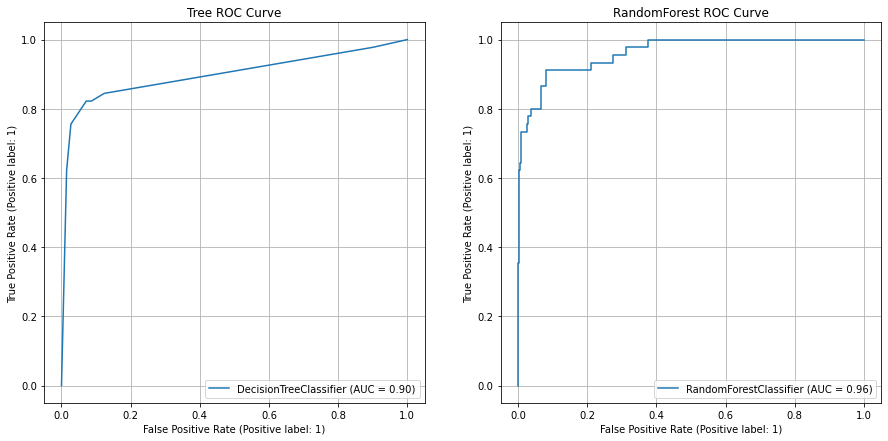

In [69]:
# plot_roc_curve()
_, ax = plt.subplots(1, 2, figsize=(15, 7))  # 변수명 언더바: 사용하지 않는다는 뜻
# plot_roc_curve(모델, X, y)
plot_roc_curve(tree, X_test, y_test, ax=ax[0])
plot_roc_curve(rf, X_test, y_test, ax=ax[1])

ax[0].set_title('Tree ROC Curve')
ax[0].grid(True)
ax[1].set_title('RandomForest ROC Curve')
ax[1].grid(True)
plt.show()

# Todo
- breast_cancer data 모델링
1. breast cander data 로드
2. train/test set으로 분리
3. 모델링 - DecisionTreeClassifier(max_depth=3), RandomForestClassifier(max_depth=2, n_estimators=200)
4. 평가 - train, test set 둘다
    - accuracy_score
    - recall, precision, f1 score, confusion_matrix (정답, 예측값)
    - PR curve, AP score (정답, 양성확률)
    - ROC curve, AUC score

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [71]:
# X, y 분할
X, y = load_breast_cancer(return_X_y=True)
# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
y_train.shape, y_test.shape

((455,), (114,))

In [72]:
# Scaling
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()
X_train_scaled = s_scaler.fit_transform(X_train)
X_test_scaled = s_scaler.transform(X_test)

In [73]:
# Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

tree = DecisionTreeClassifier(max_depth=3, random_state=0)
rf = RandomForestClassifier(max_depth=2, n_estimators=200, random_state=0)

# 학습
tree.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=2, n_estimators=200, random_state=0)

In [74]:
# 예측
pred_tree_train = tree.predict(X_train_scaled)
pred_rf_train = rf.predict(X_train_scaled)
pred_tree_test = tree.predict(X_test_scaled)
pred_rf_test = rf.predict(X_test_scaled)

In [75]:
# 양성확률
prob_tree_train = tree.predict_proba(X_train_scaled)[:, 1]
prob_rf_train = rf.predict_proba(X_train_scaled)[:, 1]
prob_tree_test = tree.predict_proba(X_test_scaled)[:, 1]
prob_rf_test = rf.predict_proba(X_test_scaled)[:, 1]

In [76]:
def print_metrics(y, pred, title=None):
    """
    평가 결과(정확도, 재현율, 정밀도, f1점수, 혼동행렬)를 출력하는 함수
    [parameter]
        y: 정답 y
        pred: 모델이 예측한 값
        title: 어떤 모델에 대한 평가결과인지 명시
    """
    if title:
        print(title)
    acc = accuracy_score(y, pred)
    recall = recall_score(y, pred)
    precision = precision_score(y, pred)
    f1 = f1_score(y, pred)
    cm = confusion_matrix(y, pred)
    print("정확도: {}, 재현율: {}, 정밀도: {}, f1점수: {}".format(acc, recall, precision, f1))
    print(cm)

In [77]:
print_metrics(y_train, pred_tree_train, title="DecisionTree Train 평가지표")

DecisionTree Train 평가지표
정확도: 0.9736263736263736, 재현율: 0.9964912280701754, 정밀도: 0.9627118644067797, f1점수: 0.9793103448275863
[[159  11]
 [  1 284]]


In [78]:
print_metrics(y_test, pred_tree_test, title="DecisionTree Test 평가지표")

DecisionTree Test 평가지표
정확도: 0.9210526315789473, 재현율: 0.9305555555555556, 정밀도: 0.9436619718309859, f1점수: 0.9370629370629372
[[38  4]
 [ 5 67]]


In [79]:
print_metrics(y_train, pred_rf_train, title="RandomForest Train 평가지표")

RandomForest Train 평가지표
정확도: 0.9692307692307692, 재현율: 0.9859649122807017, 정밀도: 0.9656357388316151, f1점수: 0.9756944444444443
[[160  10]
 [  4 281]]


In [80]:
print_metrics(y_test, pred_rf_test, title="RandomForest Test 평가지표")

RandomForest Test 평가지표
정확도: 0.9385964912280702, 재현율: 0.9444444444444444, 정밀도: 0.9577464788732394, f1점수: 0.951048951048951
[[39  3]
 [ 4 68]]


In [81]:
# precision_recall_curve
tr_precisions1, tr_recalls1, tr_thresholds1 = precision_recall_curve(y_train, prob_tree_train)
tr_precisions2, tr_recalls2, tr_thresholds2 = precision_recall_curve(y_test, prob_tree_test)
rf_precisions1, rf_recalls1, rf_thresholds1 = precision_recall_curve(y_train, prob_rf_train)
rf_precisions2, rf_recalls2, rf_thresholds2 = precision_recall_curve(y_test, prob_rf_test)

In [82]:
print("tree train 결과")
pd.DataFrame({
    "Threshold": np.append(tr_thresholds1, 1),
    "Precision": tr_precisions1,
    "Recall": tr_recalls1
})

tree train 결과


,Threshold,Precision,Recall
0,0.125000,0.940594,1.000000
1,0.666667,0.962712,0.996491
2,0.714286,0.965753,0.989474
3,0.984906,0.985240,0.936842
4,1.000000,1.000000,0.021053
5,1.000000,1.000000,0.000000


In [83]:
print("tree test 결과")
pd.DataFrame({
    "Threshold": np.append(tr_thresholds2, 1),
    "Precision": tr_precisions2,
    "Recall": tr_recalls2
})

tree test 결과


,Threshold,Precision,Recall
0,0.000000,0.631579,1.000000
1,0.125000,0.931507,0.944444
2,0.666667,0.943662,0.930556
3,0.714286,0.957143,0.930556
4,0.984906,0.970149,0.902778
5,1.000000,1.000000,0.013889
6,1.000000,1.000000,0.000000


In [84]:
print("rf train 결과")
pd.DataFrame({
    "Threshold": np.append(rf_thresholds1, 1),
    "Precision": rf_precisions1,
    "Recall": rf_recalls1
})

rf train 결과


,Threshold,Precision,Recall
0,0.371406,0.940594,1.000000
1,0.387115,0.940397,0.996491
2,0.389739,0.943522,0.996491
3,0.394825,0.943333,0.992982
4,0.397508,0.946488,0.992982
...,...,...,...
199,0.969472,1.000000,0.214035
200,0.969482,1.000000,0.210526
201,0.969818,1.000000,0.161404
202,0.970139,1.000000,0.157895


In [85]:
print("rf test 결과")
pd.DataFrame({
    "Threshold": np.append(rf_thresholds2, 1),
    "Precision": rf_precisions2,
    "Recall": rf_recalls2
})

rf test 결과


,Threshold,Precision,Recall
0,0.306519,0.900000,1.000000
1,0.330874,0.898734,0.986111
2,0.344434,0.910256,0.986111
3,0.368650,0.922078,0.986111
4,0.374734,0.934211,0.986111
...,...,...,...
62,0.969004,1.000000,0.236111
63,0.969291,1.000000,0.208333
64,0.969482,1.000000,0.194444
65,0.970139,1.000000,0.180556


In [86]:
print('Decision Tree AP score - train', average_precision_score(y_train, prob_tree_train))
print('RandomForest AP score - train', average_precision_score(y_train, prob_rf_train))
print('Decision Tree AP score - test', average_precision_score(y_test, prob_tree_test))
print('RandomForest AP score - test', average_precision_score(y_test, prob_rf_test))

Decision Tree AP score - train 0.9842102478389377
RandomForest AP score - train 0.9973840556546545
Decision Tree AP score - test 0.9508563971094506
RandomForest AP score - test 0.977122126791544


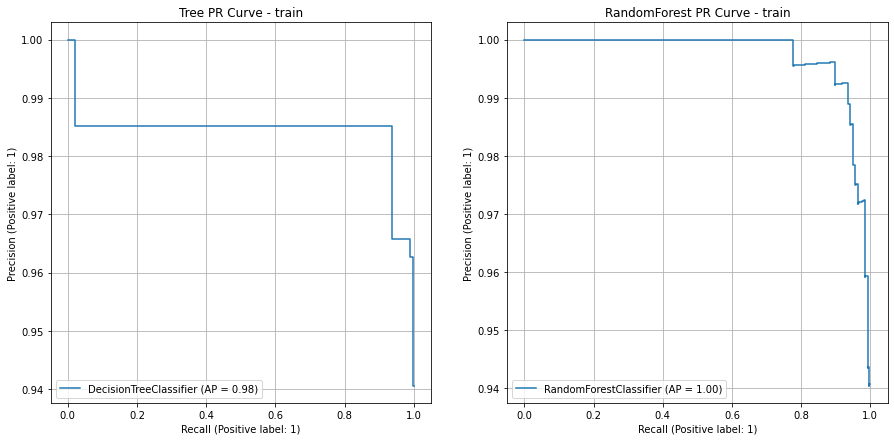

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

plot_precision_recall_curve(tree, X_train_scaled, y_train, ax=ax[0])   # name 속성 추가 가능
plot_precision_recall_curve(rf, X_train_scaled, y_train, ax=ax[1])

ax[0].set_title('Tree PR Curve - train')
ax[0].grid(True)
ax[1].set_title('RandomForest PR Curve - train')
ax[1].grid(True)
plt.show()

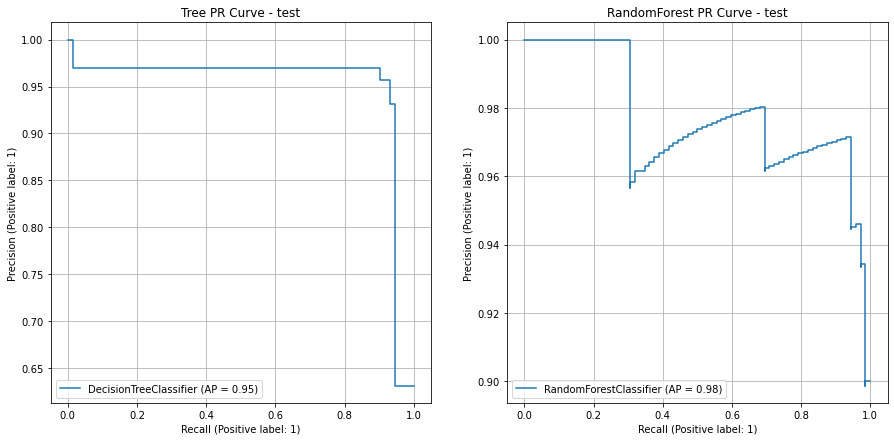

In [88]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

plot_precision_recall_curve(tree, X_test_scaled, y_test, ax=ax[0])
plot_precision_recall_curve(rf, X_test_scaled, y_test, ax=ax[1])

ax[0].set_title('Tree PR Curve - test')
ax[0].grid(True)
ax[1].set_title('RandomForest PR Curve - test')
ax[1].grid(True)
# plt.yticks(np.arange(0, 1.01, 0.1))
plt.show()

In [89]:
# ROC curve
tr_fprs1, tr_tprs1, tr_thresholds1 = roc_curve(y_train, prob_tree_train)
tr_fprs2, tr_tprs2, tr_thresholds2 = roc_curve(y_test, prob_tree_test)
rf_fprs1, rf_tprs1, rf_thresholds1 = roc_curve(y_train, prob_rf_train)
rf_fprs2, rf_tprs2, rf_thresholds2 = roc_curve(y_test, prob_rf_test)

In [90]:
print("tree train 결과")
pd.DataFrame({
    "Threshold": tr_thresholds1,
    "FPRs": tr_fprs1,
    "TPRs": tr_tprs1
})

tree train 결과


,Threshold,FPRs,TPRs
0,2.000000,0.000000,0.000000
1,1.000000,0.000000,0.021053
2,0.984906,0.023529,0.936842
3,0.714286,0.058824,0.989474
4,0.666667,0.064706,0.996491
5,0.125000,0.105882,1.000000
6,0.000000,1.000000,1.000000


In [91]:
print("tree test 결과")
pd.DataFrame({
    "Threshold": tr_thresholds2,
    "FPRs": tr_fprs2,
    "TPRs": tr_tprs2
})

tree test 결과


,Threshold,FPRs,TPRs
0,2.000000,0.000000,0.000000
1,1.000000,0.000000,0.013889
2,0.984906,0.047619,0.902778
3,0.714286,0.071429,0.930556
4,0.666667,0.095238,0.930556
5,0.125000,0.119048,0.944444
6,0.000000,1.000000,1.000000


In [92]:
print("rf train 결과")
pd.DataFrame({
    "Threshold": rf_thresholds1,
    "FPRs": rf_fprs1,
    "TPRs": rf_tprs1
})

rf train 결과


,Threshold,FPRs,TPRs
0,1.970139,0.000000,0.000000
1,0.970139,0.000000,0.157895
2,0.969818,0.000000,0.161404
3,0.969482,0.000000,0.210526
4,0.969291,0.000000,0.217544
...,...,...,...
63,0.027948,0.882353,1.000000
64,0.027719,0.911765,1.000000
65,0.027640,0.923529,1.000000
66,0.027580,0.929412,1.000000


In [93]:
print("rf test 결과")
pd.DataFrame({
    "Threshold": rf_thresholds2,
    "FPRs": rf_fprs2,
    "TPRs": rf_tprs2
})

rf test 결과


,Threshold,FPRs,TPRs
0,1.970139,0.000000,0.000000
1,0.970139,0.000000,0.180556
2,0.969291,0.000000,0.208333
3,0.969004,0.000000,0.236111
4,0.967907,0.000000,0.305556
5,0.967648,0.023810,0.305556
6,0.967520,0.023810,0.319444
7,0.967250,0.023810,0.347222
8,0.915503,0.023810,0.694444
9,0.915060,0.047619,0.694444


In [94]:
print('DecisionTree roc auc 점수-train:', roc_auc_score(y_train, prob_tree_train))
print('RandomForest roc auc 점수-train:', roc_auc_score(y_train, prob_rf_train))
print('DecisionTree roc auc 점수-test:', roc_auc_score(y_test, prob_tree_test))
print('RandomForest roc auc 점수-test:', roc_auc_score(y_test, prob_rf_test))

DecisionTree roc auc 점수-train: 0.9863261093911249
RandomForest roc auc 점수-train: 0.9957481940144479
DecisionTree roc auc 점수-test: 0.9446097883597883
RandomForest roc auc 점수-test: 0.9718915343915344


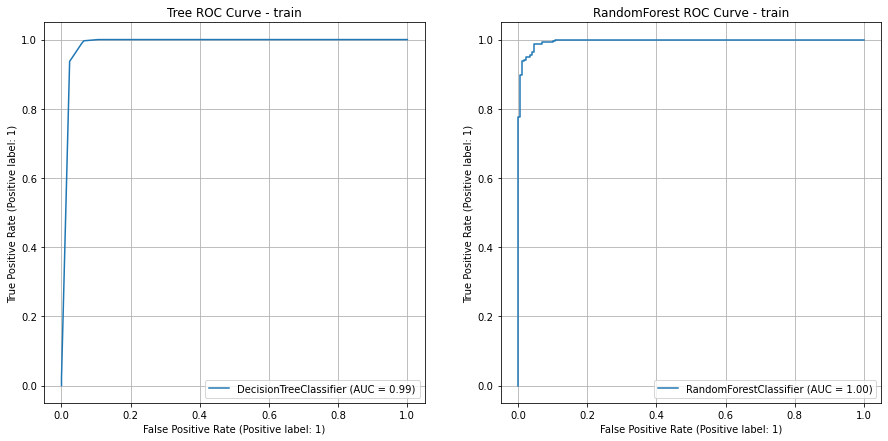

In [95]:
# plot_roc_curve()
_, ax = plt.subplots(1, 2, figsize=(15, 7))

plot_roc_curve(tree, X_train_scaled, y_train, ax=ax[0])
plot_roc_curve(rf, X_train_scaled, y_train, ax=ax[1])

ax[0].set_title('Tree ROC Curve - train')
ax[0].grid(True)
ax[1].set_title('RandomForest ROC Curve - train')
ax[1].grid(True)
plt.show()

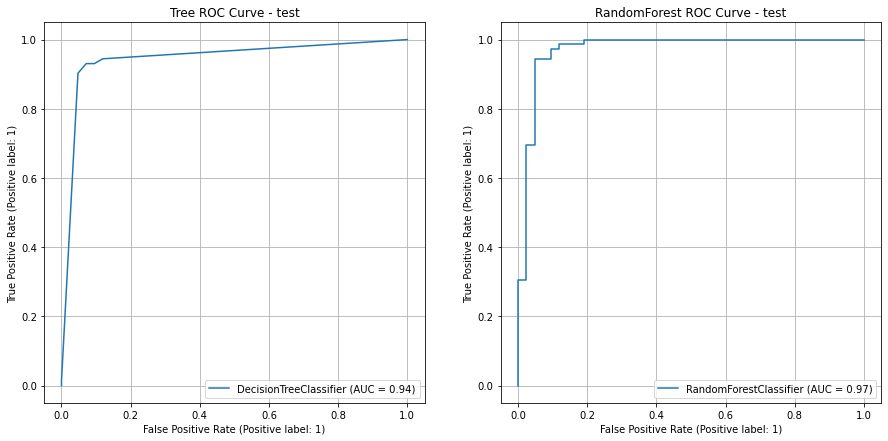

In [96]:
_, ax = plt.subplots(1, 2, figsize=(15, 7))

plot_roc_curve(tree, X_test_scaled, y_test, ax=ax[0])
plot_roc_curve(rf, X_test_scaled, y_test, ax=ax[1])

ax[0].set_title('Tree ROC Curve - test')
ax[0].grid(True)
ax[1].set_title('RandomForest ROC Curve - test')
ax[1].grid(True)
plt.show()

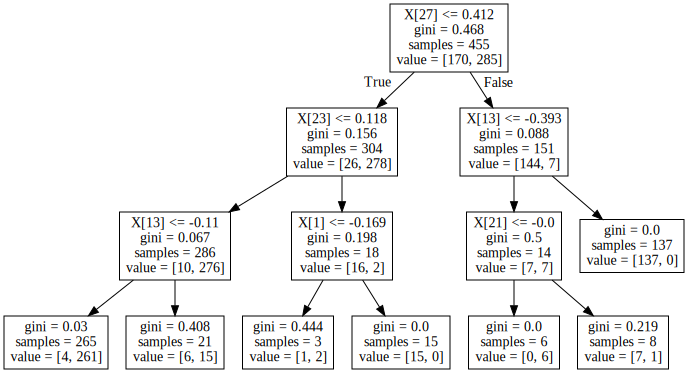

In [97]:
from graphviz import Source
from sklearn.tree import export_graphviz
graph = Source(export_graphviz(tree, out_file=None))
graph